# Evaluating Task Performance

## Introduction

All medical images are created for a purpose, to detect, diagnose, quantify, monitor, etc. For this reason, [OIC](https://aapm.onlinelibrary.wiley.com/doi/full/10.1118/1.4881148) 

**Add bit to recruit results.csv for task performance, maybe add oct2py wrapper for LCD-CT**

In [7]:
!ls /gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/

 ACR464		   bkg_only	 CTP404_peds    old
 anthropomorphic   CCT189_peds	 metadata.csv  'Sibley Hospital Data'


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

base_dir = Path('/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/')
meta = pd.read_csv(base_dir / 'metadata.csv')
meta = meta[meta.phantom.isin(['MITA-LCD', 'uniform'])]
meta

,Code #,Name,age [year],gender,weight [kg],height [cm],BMI,weight percentile,ethnicity,effective diameter [cm],Dose [%],recon,phantom,file,simulated,FOV [cm],kernel,scanner
420,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,10,RED-CNN augmented,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,39.0,NaN,NaN
421,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,10,RED-CNN,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,39.0,NaN,NaN
422,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,10,fbp,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,39.0,NaN,NaN
423,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40,RED-CNN augmented,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,39.0,NaN,NaN
424,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40,RED-CNN,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,39.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,NaN,15.1 cm uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1,70,RED-CNN,uniform,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,17.0,NaN,NaN
794,NaN,15.1 cm uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1,70,fbp,uniform,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,17.0,NaN,NaN
795,NaN,15.1 cm uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1,85,RED-CNN augmented,uniform,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,17.0,NaN,NaN
796,NaN,15.1 cm uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1,85,RED-CNN,uniform,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,17.0,NaN,NaN


In [23]:
import SimpleITK as sitk
from utils import get_ground_truth

In [53]:
sorted(meta['effective diameter [cm]'].unique())

[11.2, 13.1, 15.1, 18.5, 20.0, 21.6, 29.2, 35.0]

In [57]:
diam = 20
dose = 100
recon = 'fbp'
sample = meta[(meta['effective diameter [cm]'] == 20) & (meta['Dose [%]'] == dose) & (meta['recon']==recon)]
sample

,Code #,Name,age [year],gender,weight [kg],height [cm],BMI,weight percentile,ethnicity,effective diameter [cm],Dose [%],recon,phantom,file,simulated,FOV [cm],kernel,scanner
575,NaN,20.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,100,fbp,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,34.0,NaN,NaN
617,NaN,20.0 cm uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,100,fbp,uniform,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,34.0,NaN,NaN


In [61]:
 sample[sample.phantom=='uniform'].file.item()

'/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/CCT189_peds/diameter200mm/signal_absent/dose_100/fbp/signal_absent.mhd'

In [199]:
diam = 20
dose = 100
recon = 'fbp'
sample = meta[(meta['effective diameter [cm]'] == 35) & (meta['Dose [%]'] == dose) & (meta['recon']==recon)]

sa_fname = sample[sample.phantom=='uniform'].file.item()

sa_img = sitk.ReadImage(sa_fname)
sa_vol = sitk.GetArrayFromImage(sa_img)

sa_gt_img = sitk.ReadImage(get_ground_truth(sa_fname))
sa_gt_vol = sitk.GetArrayFromImage(sa_gt_img)

sp_fname = sample[sample.phantom=='MITA-LCD'].file.item()

sp_img = sitk.ReadImage(sp_fname)
sp_vol = sitk.GetArrayFromImage(sp_img)

sp_gt_img = sitk.ReadImage(get_ground_truth(sp_fname))
sp_gt_vol = sitk.GetArrayFromImage(sp_gt_img)

sp_vol.shape, sa_vol.shape

((200, 512, 512), (200, 512, 512))

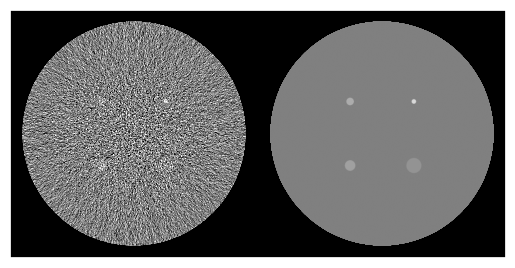

In [202]:
from utils import ctshow
ctshow(np.concatenate([sp_vol[0], sp_gt_vol], axis=1), (40, 0))

In [292]:
from oct2py import octave
import os

def measure_LCD(sp_vol, sa_vol, sp_gt_vol, observers=['LG_CHO_2D']):
    # curdir = os.path.dirname(os.path.realpath(__file__))
    # octave.cd('../src/LCD')
    signal_present_array = sp_vol.transpose(1,2,0)
    signal_absent_array = sa_vol.transpose(1,2,0)
    octave.pwd()
    octave.addpath('classes')
    octave.addpath('functions')
    res = octave.measure_LCD(signal_present_array, signal_absent_array, sp_gt_vol, observers)
    res = {k:v.squeeze() for k,v in res.items()}
    return pd.DataFrame(res)

<Axes: xlabel='insert_HU', ylabel='auc'>

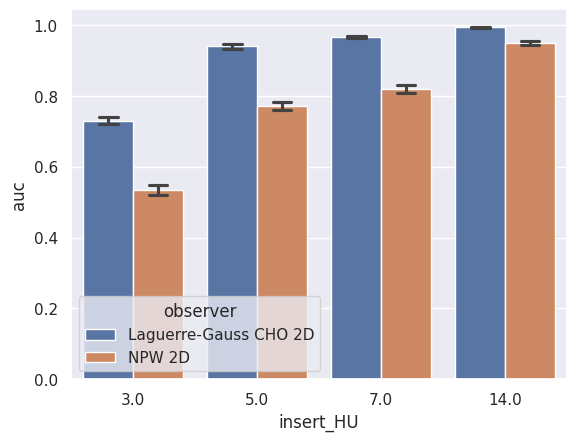

In [293]:
diam = 20
dose = 100
recon = 'fbp'
sample = meta[(meta['effective diameter [cm]'] == 20) & (meta['Dose [%]'] == dose) & (meta['recon']==recon)]

sa_fname = sample[sample.phantom=='uniform'].file.item()

sa_img = sitk.ReadImage(sa_fname)
sa_vol = sitk.GetArrayFromImage(sa_img)

sa_gt_img = sitk.ReadImage(get_ground_truth(sa_fname))
sa_gt_vol = sitk.GetArrayFromImage(sa_gt_img)

sp_fname = sample[sample.phantom=='MITA-LCD'].file.item()

sp_img = sitk.ReadImage(sp_fname)
sp_vol = sitk.GetArrayFromImage(sp_img)

sp_gt_img = sitk.ReadImage(get_ground_truth(sp_fname))
sp_gt_vol = sitk.GetArrayFromImage(sp_gt_img)

sp_vol.shape, sa_vol.shape

res = measure_LCD(sp_vol, sa_vol, sp_gt_vol, observers=['LG_CHO_2D', 'NPWE_2D'])
sns.barplot(data=res, x='insert_HU', y='auc', capsize=0.3, hue='observer')

In [294]:
results_csv = Path('lcd_results.csv')

if results_csv.exists():
    results = pd.read_csv(results_csv)
else:
    df_list = []
    for diam in meta['effective diameter [cm]'].unique():
        for dose in meta['Dose [%]'].unique():
            for recon in meta['recon'].unique():
                sample = meta[(meta['effective diameter [cm]']==diam) &
                              (meta['Dose [%]']==dose) &
                              (meta['recon']==recon)]
                if len(sample) != 2: continue

                sa_fname = sample[sample.phantom=='uniform'].file.item()

                sa_img = sitk.ReadImage(sa_fname)
                sa_vol = sitk.GetArrayFromImage(sa_img)

                sa_gt_img = sitk.ReadImage(get_ground_truth(sa_fname))
                sa_gt_vol = sitk.GetArrayFromImage(sa_gt_img)

                sp_fname = sample[sample.phantom=='MITA-LCD'].file.item()

                sp_img = sitk.ReadImage(sp_fname)
                sp_vol = sitk.GetArrayFromImage(sp_img)

                sp_gt_img = sitk.ReadImage(get_ground_truth(sp_fname))
                sp_gt_vol = sitk.GetArrayFromImage(sp_gt_img)

                sample_df = measure_LCD(sp_vol, sa_vol, sp_gt_vol, observers=['LG_CHO_2D', 'NPWE_2D'])
                sample_df['effective diameter [cm]'] = diam
                sample_df['Dose [%]'] = dose
                sample_df['recon'] = recon
                df_list.append(sample_df)
    results = pd.concat(df_list)
    results.to_csv(results_csv, index=False)

In [296]:
results

,observer,insert_HU,snr,auc,reader,effective diameter [cm],Dose [%],recon
0,Laguerre-Gauss CHO 2D,14.0,2.718210,0.9693,1.0,35.0,10,RED-CNN augmented
1,Laguerre-Gauss CHO 2D,14.0,2.906419,0.9751,2.0,35.0,10,RED-CNN augmented
2,Laguerre-Gauss CHO 2D,14.0,2.556301,0.9641,3.0,35.0,10,RED-CNN augmented
3,Laguerre-Gauss CHO 2D,14.0,3.032131,0.9868,4.0,35.0,10,RED-CNN augmented
4,Laguerre-Gauss CHO 2D,14.0,2.578619,0.9662,5.0,35.0,10,RED-CNN augmented
...,...,...,...,...,...,...,...,...
75,NPW 2D,3.0,0.515464,0.6477,6.0,15.1,85,fbp
76,NPW 2D,3.0,0.413914,0.6205,7.0,15.1,85,fbp
77,NPW 2D,3.0,0.537826,0.6412,8.0,15.1,85,fbp
78,NPW 2D,3.0,0.553680,0.6517,9.0,15.1,85,fbp


In [297]:

import seaborn as sns
import numpy as np
import sys
sys.path.append('..')
from utils import calculate_task_improvement
sys.path.append('../..')
from noise_assessments import order_recons

# results = pd.read_csv('results.csv')
# results

In [298]:
# results[results['experiment'] == 'task performance'].shape, results[results['experiment'] == 'noise reduction'].shape

In [299]:
# results['experiment'] = 'noise reduction'
# results.rename({'effective diameter (cm)': 'effective diameter [cm]', 'age (year)' : 'age [year]', 'weight (kg)':'weight [kg]', 'height (cm)': 'height [cm]', 'rmse':'RMSE [HU]', 'noise std':'noise std [HU]'},axis='columns', inplace=True)
# results = pd.concat([results, df])

# results


files = []
for idx, row in results[results.experiment == 'task performance'].iterrows():
    new_file = results[(results['phantom'] == row['phantom']) &
                       (results['effective diameter [cm]'] == row['effective diameter [cm]']) & 
                       (results['Dose [%]'] == row['Dose [%]']) &
                       (results['recon'] == row['recon']) &
                       (results['sim number'] == row['sim number']) &
                       (results['experiment'] == 'noise reduction')].file.item()
    files.append(new_file)
results.loc[results.experiment == 'task performance', 'file'] = files

In [300]:
recon_order = order_recons(results.recon.unique())

<Axes: xlabel='effective diameter [cm]', ylabel='auc'>

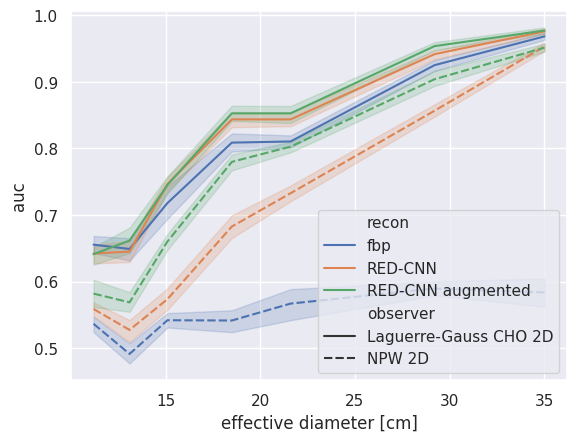

In [301]:
sns.lineplot(data=results[(results['effective diameter [cm]']!=20)&(results['Dose [%]']==25)&
                         (results.insert_HU==3)],
             x='effective diameter [cm]',
             y='auc',
             hue='recon',
             style='observer',
             hue_order=recon_order)

if 'delta auc' not in results:
    results['delta auc'] = calculate_task_improvement(results)['delta auc']

## LG CHO

<Axes: xlabel='effective diameter [cm]', ylabel='auc'>

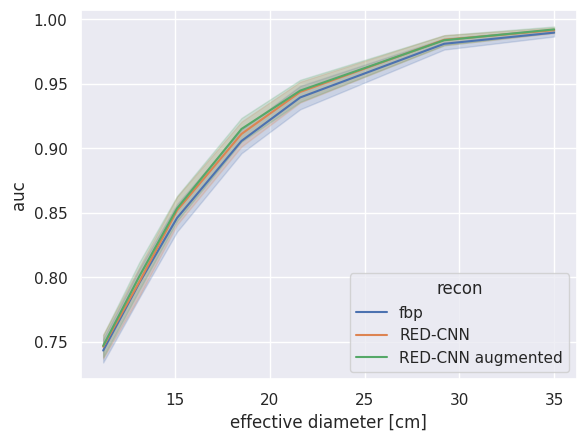

In [302]:
sns.lineplot(data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                          (results['effective diameter [cm]']!=20)],
                            x='effective diameter [cm]', y='auc', hue='recon', hue_order=recon_order)

<Axes: xlabel='effective diameter [cm]', ylabel='auc'>

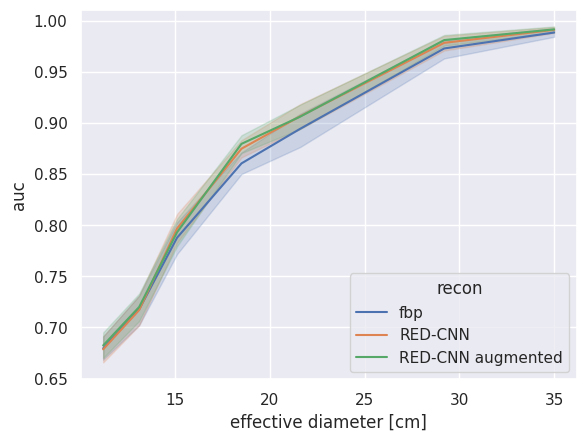

In [303]:
sns.lineplot(data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                          (results['effective diameter [cm]']!=20) &
                          (results['Dose [%]']==25)], x='effective diameter [cm]', y='auc', hue='recon', hue_order=recon_order)

In [304]:
results['contrast [HU]'] = results.insert_HU

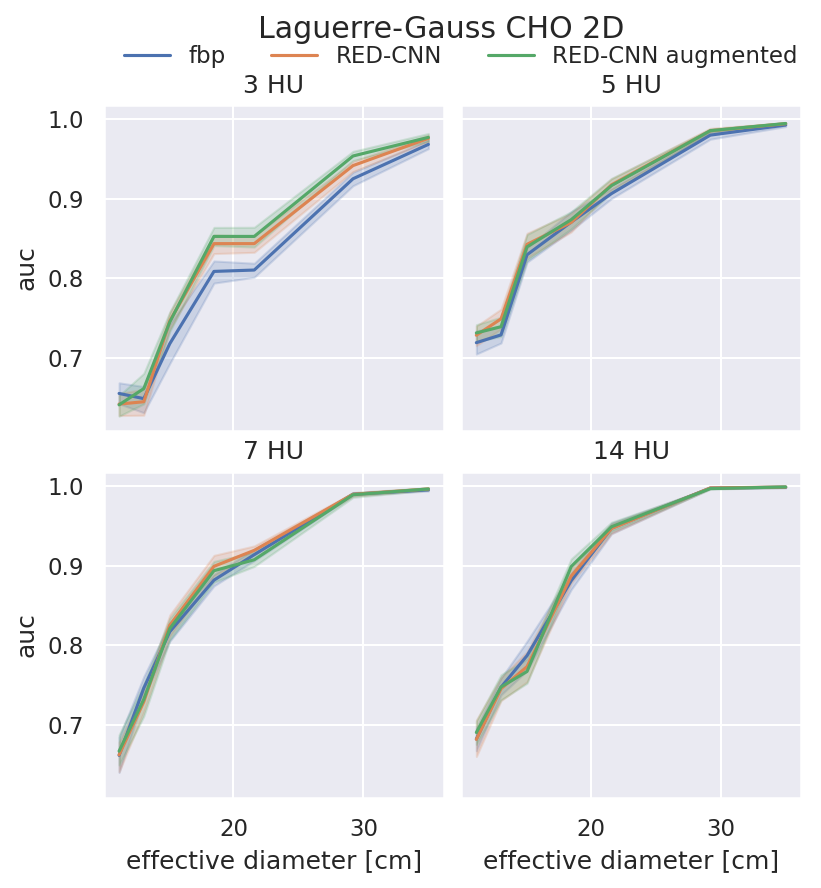

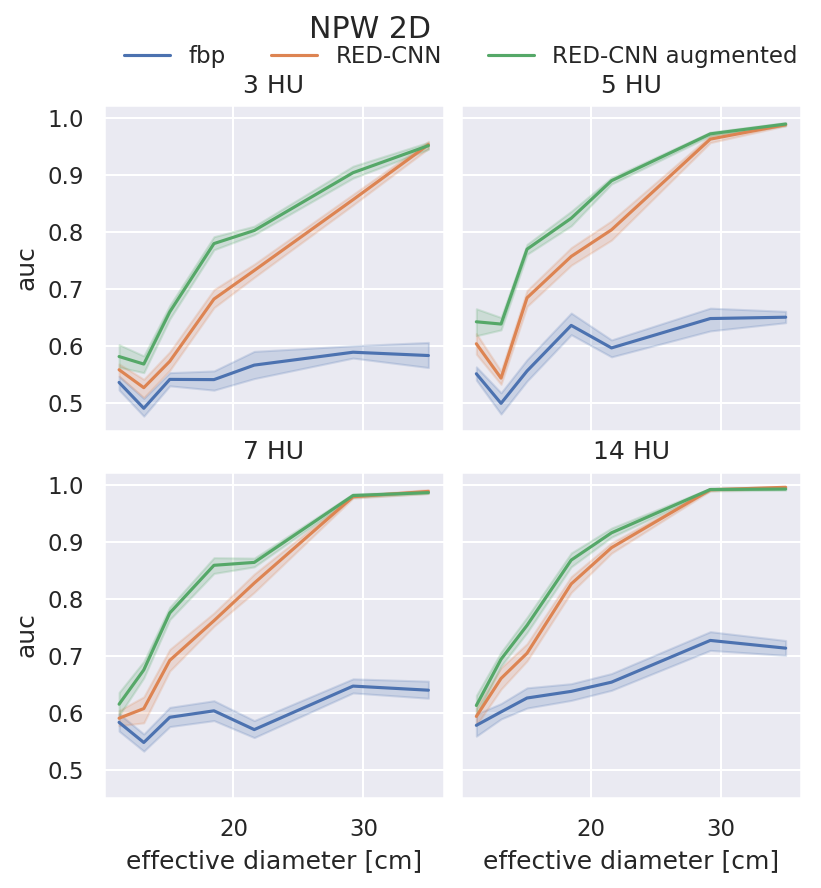

In [305]:
for observer in [o for o in results.observer.unique() if isinstance(o, str)]:
    f, axs = plt.subplots(2,2, dpi=150, figsize=(6,6), sharex=True, sharey=True, gridspec_kw=dict(wspace=0.05, hspace=0.125))
    axs = axs.flatten()
    for idx, hu in enumerate([3, 5, 7, 14]):
        legend = True if idx < 1 else False
        sns.lineplot(data=results[(results['observer']==f'{observer}') &
                                  (results['effective diameter [cm]']!=20) &
                                  (results['Dose [%]']==25) &
                                  (results['contrast [HU]'] == hu)], 
                     x='effective diameter [cm]',
                     y='auc',
                     hue='recon',
                     hue_order=recon_order, ax=axs[idx], legend=legend)
        axs[idx].set_title(f'{hu} HU')
    f.suptitle(f'{observer}')
    sns.move_legend(
        axs[0], "lower center",
        bbox_to_anchor=(1.05, 1.05), ncol=3, frameon=False, title=None,
    )
    f.savefig(f'{observer}.png', dpi=600)

**Nirmal's comment: add some example images from **

In [306]:
results.iloc[results['delta auc'].argmax()]

KeyError: 'delta auc'

In [307]:
# results.iloc[results.recon=='RED-CNN augmented']['delta auc'].argmax()]

In [322]:
results.observer.unique()

array(['Laguerre-Gauss CHO 2D', 'NPW 2D               '], dtype=object)

In [323]:
results.replace({'Laguerre-Gauss CHO 2D': 'LG-CHO', 'NPW 2D               ':'NPW'})

,observer,insert_HU,snr,auc,reader,effective diameter [cm],Dose [%],recon,contrast [HU]
0,LG-CHO,14.0,2.718210,0.9693,1.0,35.0,10,RED-CNN augmented,14.0
1,LG-CHO,14.0,2.906419,0.9751,2.0,35.0,10,RED-CNN augmented,14.0
2,LG-CHO,14.0,2.556301,0.9641,3.0,35.0,10,RED-CNN augmented,14.0
3,LG-CHO,14.0,3.032131,0.9868,4.0,35.0,10,RED-CNN augmented,14.0
4,LG-CHO,14.0,2.578619,0.9662,5.0,35.0,10,RED-CNN augmented,14.0
...,...,...,...,...,...,...,...,...,...
75,NPW,3.0,0.515464,0.6477,6.0,15.1,85,fbp,3.0
76,NPW,3.0,0.413914,0.6205,7.0,15.1,85,fbp,3.0
77,NPW,3.0,0.537826,0.6412,8.0,15.1,85,fbp,3.0
78,NPW,3.0,0.553680,0.6517,9.0,15.1,85,fbp,3.0


### Figure 8

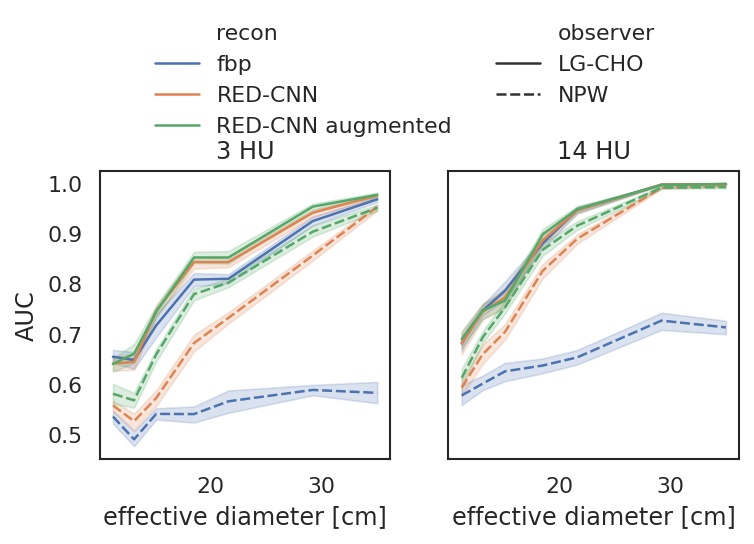

In [325]:
sns.set_context('paper', font_scale=1.2)
sns.set_style('white')
f, axs = plt.subplots(1,2, figsize=(5.5,2.5), dpi=150, sharex=True, sharey=True)
axs = axs.flatten()
for idx, hu in enumerate([3, 14]):
    legend = True if idx < 1 else False
    sns.lineplot(data=results[(results['effective diameter [cm]']!=20) &
                              (results['Dose [%]']==25) &
                              (results['contrast [HU]'] == hu)].replace({'Laguerre-Gauss CHO 2D': 'LG-CHO', 'NPW 2D               ':'NPW'}), 
                 x='effective diameter [cm]',
                 y='auc',
                 hue='recon',
                 hue_order=recon_order, ax=axs[idx], style='observer', legend=legend)
    axs[idx].set_title(f'{hu} HU')
    axs[idx].set_ylabel('AUC')
sns.move_legend(
    axs[0], "lower center",
    bbox_to_anchor=(1.05, 1.05), ncol=2, frameon=False, title=None,
)
f.savefig(f'task_performance.png', dpi=600, bbox_inches='tight')

ValueError: Could not interpret value `delta auc` for `y`. An entry with this name does not appear in `data`.

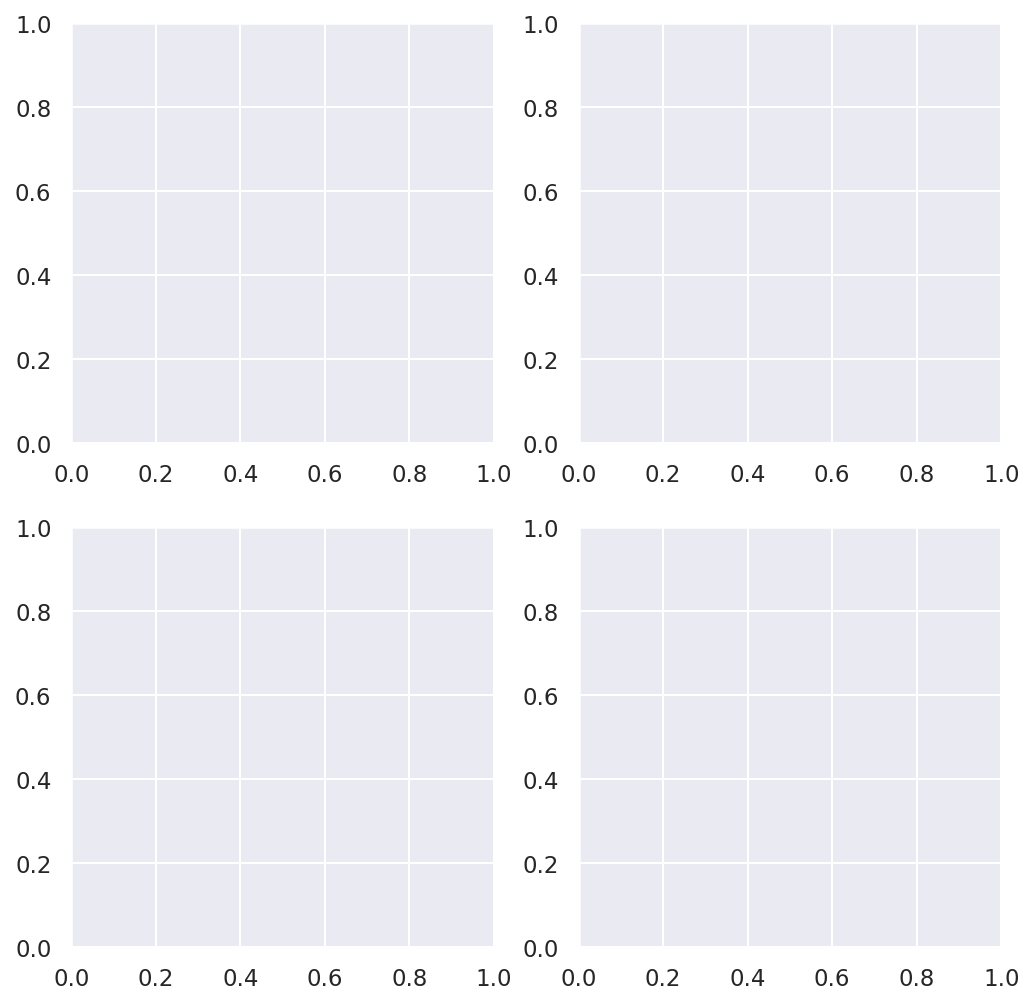

In [310]:
for observer in [o for o in results.observer.unique() if isinstance(o, str)]:
    f, axs = plt.subplots(2,2, figsize=(8,8), dpi=150)
    axs = axs.flatten()
    for idx, hu in enumerate([3, 5, 7, 14]):
        legend = True if idx < 1 else False
        sns.lineplot(data=results[(results['observer']==f'{observer}') &
                                  (results['effective diameter [cm]']!=20) &
                                  (results['Dose [%]']==25) &
                                  (results['contrast [HU]'] == hu)], 
                     x='effective diameter [cm]',
                     y='delta auc',
                     hue='recon',
                     hue_order=recon_order, ax=axs[idx], legend=legend)
        axs[idx].set_title(f'{hu} HU')
    f.suptitle(f'{observer}')
    sns.move_legend(
        axs[0], "lower center",
        bbox_to_anchor=(1.2, 1), ncol=3, frameon=False, title=None,
    )
    f.show()

In [ ]:
def age_to_eff_diameter(age):
    # https://www.aapm.org/pubs/reports/rpt_204.pdf
    x = age
    a = 18.788598
    b = 0.19486455
    c = -1.060056
    d = -7.6244784
    y = a + b*x**1.5 + c *x**0.5 + d*np.exp(-x)
    eff_diam = y
    return eff_diam

adult_waist_circumferences_cm = {
    # 20: 90.7,
    30: 99.9,
    40: 102.8,
    # 50: 103.3,
    60: 106.2,
    70: 106.6,
    80: 104.1
}

def diameter_range_from_subgroup(subgroup):
    if subgroup == 'newborn': return (0, age_to_eff_diameter(1/12))
    elif subgroup == 'infant': return (age_to_eff_diameter(1/12), age_to_eff_diameter(2))
    elif subgroup == 'child': return (age_to_eff_diameter(2), age_to_eff_diameter(12))
    elif subgroup == 'adolescent': return (age_to_eff_diameter(12), age_to_eff_diameter(22))
    else: return (age_to_eff_diameter(22), 100)

def pediatric_subgroup(diameter):
    if diameter < age_to_eff_diameter(1):
        return 'newborn'
    elif (diameter >= age_to_eff_diameter(1)) & (diameter < age_to_eff_diameter(5)):
        return 'infant'
    elif (diameter >= age_to_eff_diameter(5)) & (diameter < age_to_eff_diameter(12)):
        return 'child'
    elif (diameter >= age_to_eff_diameter(12)) & (diameter < age_to_eff_diameter(22)):
        return 'adolescent'
    else:
        return 'adult'

In [ ]:
results['pediatric subgroup'] = results['effective diameter [cm]'].apply(pediatric_subgroup)
results

In [ ]:
for observer in [o for o in results.observer.unique() if isinstance(o, str)]:
    f, axs = plt.subplots(2,2, figsize=(12,7), dpi=150, sharex=True, sharey=True)
    axs = axs.flatten()
    for idx, hu in enumerate([3, 5, 7, 14]):
        legend = True if idx < 1 else False
        sns.barplot(data=results[(results['effective diameter [cm]']!=200) &
                                  (results['Dose [%]']==25) &
                                  (results['contrast [HU]'] == hu) &
                                  (results['observer'] == observer)], 
                     x='recon',
                     y='delta auc',
                     order = recon_order,
                     hue='pediatric subgroup',
                     ax=axs[idx], legend=legend, capsize=0.5)
        axs[idx].set_title(f'{hu} HU')
    sns.move_legend(
        axs[0], "lower center",
        bbox_to_anchor=(1.05, 1.05), ncols=5, title=None, frameon=False,
    )
    f.suptitle(observer)
    plt.savefig(f'subgroup_task_performance_{observer}.png', dpi=600, bbox_inches='tight')

In [ ]:
results[results.observer == 'Laguerre-Gauss CHO 2D'].sort_values(by='delta auc', ascending=False)

In [ ]:
results[results.observer == 'NPW 2D'].sort_values(by='delta auc', ascending=False).iloc[0]

In [ ]:
from utils import load_mhd, ctshow

In [ ]:
f= results[results.observer == 'Laguerre-Gauss CHO 2D'].sort_values(by='delta auc', ascending=False).file.iloc[0]
vol = load_mhd(f)
ctshow(vol[0])

In [ ]:
recon = 'fbp'
offset = 1000 if recon == 'fbp' else 0
vol = load_mhd(results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35) & (results['phantom'] == 'MITA-LCD') & (results['recon']==recon)].iloc[0].file) - offset
ctshow(vol[:20].mean(axis=0), window=(80, 0))

## Most improved according to LG

In [ ]:
results[(results['Dose [%]']==25) & (results['pediatric subgroup']=='infant') & (results['experiment'] == 'task performance') & (results['recon']=='fbp') & (results['contrast [HU]'] == 3 ) & (results['observer'] == 'Laguerre-Gauss CHO 2D')]['auc'].mean()

In [ ]:
results[(results['Dose [%]']==25) & (results['pediatric subgroup']=='infant') & (results['experiment'] == 'task performance') & (results['recon']=='RED-CNN') & (results['contrast [HU]'] == 3 ) & (results['observer'] == 'Laguerre-Gauss CHO 2D')]['auc'].mean()

In [ ]:
results[(results['Dose [%]']==25) & (results['pediatric subgroup']=='infant') & (results['experiment'] == 'task performance') & (results['recon']=='RED-CNN augmented') & (results['contrast [HU]'] == 3 ) & (results['observer'] == 'Laguerre-Gauss CHO 2D')]['auc'].mean()

In [ ]:
results[results['pediatric subgroup'] == 'infant']['effective diameter [cm]'].unique()

In [ ]:
recon = 'fbp'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==18.5) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 3) & (results['observer'] == 'Laguerre-Gauss CHO 2D')].iloc[0]
print(study)
vol = load_mhd(study.file) - offset
ctshow(vol[:20].mean(axis=0), window=(80, 0))

In [ ]:
recon = 'RED-CNN'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==18.5) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 3)].iloc[0]
print(study)
vol = load_mhd(study.file) - offset  - 5
ctshow(vol[:20].mean(axis=0), window=(80, 0))

In [ ]:
recon = 'RED-CNN augmented'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==18.5) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 3)].iloc[0]
print(study)
vol = load_mhd(study.file) - offset
ctshow(vol[:20].mean(axis=0), window=(80, 0))

## most improved according to NPW

In [ ]:
results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']=='fbp') & (results['contrast [HU]'] == 7 ) & (results['observer'] == 'NPW 2D')]['auc'].mean()

In [ ]:
results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']=='RED-CNN') & (results['contrast [HU]'] == 7 ) & (results['observer'] == 'NPW 2D')]['auc'].mean()

In [ ]:
results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']=='RED-CNN augmented') & (results['contrast [HU]'] == 7 ) & (results['observer'] == 'NPW 2D')]['auc'].mean()

In [ ]:
results[results.observer == 'Laguerre-Gauss CHO 2D'].iloc[results[results.observer == 'Laguerre-Gauss CHO 2D']['delta auc'].argmax()]

In [ ]:
recon = 'fbp'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 7) & (results['observer'] == 'NPW 2D')].iloc[0]
print(study)
vol = load_mhd(study.file) - offset
ctshow(vol[:50].mean(axis=0), window=(80, 0))

In [ ]:
recon = 'RED-CNN'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 7) & (results['observer'] == 'NPW 2D')].iloc[0]
print(study)
vol = load_mhd(study.file) - offset  - 5
ctshow(vol[:50].mean(axis=0), window=(80, 0))

In [ ]:
recon = 'RED-CNN augmented'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 7)& (results['observer'] == 'NPW 2D')].iloc[0]
print(study)
vol = load_mhd(study.file) - offset
ctshow(vol[:50].mean(axis=0), window=(80, 0))

In [ ]:
sns.lineplot(data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                     (results['diameter']!=200) &
                     (results['dose_level']==25)], x='diameter', y='delta auc', hue='recon')

In [ ]:
sns.lineplot(data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                     (results['diameter']!=200)], x='diameter', y='delta auc', style='recon', hue='insert_HU')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, results.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                         (results['diameter']!=200) &
                         (results['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, results.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                         (results['diameter']!=200) &
                         (results['dose_level']==25)&       
                         (results['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, results.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                         (df['diameter']!=200) &
                         (df['dose_level']==100)&       
                         (df['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

Looks like denoising only helps with the really low contrast and larger lesions

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['diameter']!=200) &
                         (df['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['diameter']!=200) &
                         (df['insert_HU'] == hu) &
                         (df['dose_level']==25) ], x='diameter', y='auc', hue='recon', style='observer')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['diameter']!=200) &
                         (df['insert_HU'] == hu) &
                         (df['dose_level']==100) ], x='diameter', y='auc', hue='recon', style='observer')

In [ ]:
sns.lineplot(data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                     (df['diameter']!=200)], x='diameter', y='delta auc', hue='dose_level', style='recon')

## NPW

In [ ]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200)], x='diameter', y='auc', hue='recon')

In [ ]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200) &
                     (df['dose_level'] == 25)], x='diameter', y='auc', hue='recon')

In [ ]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200)], x='diameter', y='delta auc', hue='recon')

In [ ]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200) &
                     (df['dose_level'] == 25)], x='diameter', y='delta auc', hue='recon')

In [ ]:
f = sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200)], x='diameter', y='delta auc', hue='dose_level', style='recon')
sns.move_legend(
    f, "lower center",
    bbox_to_anchor=(0.5, 1), ncol=2, frameon=False
)

In [ ]:
def calculate_task_improvement(results, measure='auc'):
    means = df.groupby(['effective diameter [cm]', 'recon', 'contrast [HU]', 'Dose [%]', 'observer'])['auc'].mean()
    noise_reductions = []
    for idx, row in results[results['experiment'] == 'task performance'].iterrows():
        fbp_noise = means[row['effective diameter [cm]'], 'fbp',row['contrast [HU]'], row['Dose [%]'], row['observer']]
        noise_reductions.append(row[measure] - fbp_noise)
    results.loc[results['experiment'] == 'task performance', f'delta {measure}'] = noise_reductions
    return results